In [67]:
from google.colab import files
uploaded = files.upload()
!unzip titanic.zip -d ./titanic_data


Saving titanic.zip to titanic (2).zip
Archive:  titanic.zip
replace ./titanic_data/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [137]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optimizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , recall_score , f1_score , classification_report

In [69]:
data = pd.read_csv(r"/content/titanic_data/train.csv")
print(data.shape)
print(data.info())
data.head()
data = data.drop(columns=["Name" , "Ticket" , "PassengerId" ,"Cabin"] , axis=1)


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [70]:
print(list(data.columns))
for col in data.columns:
   print(f"{col} : {data[col].unique()}")

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
Age : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6]
Fare : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708 

In [71]:
for col in data.columns:
   print(f"{col} : {len(data[col].unique())}")

Survived : 2
Pclass : 3
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Fare : 248
Embarked : 4


In [72]:
data.isnull().sum()
data['Age'].fillna(data['Age'].median() , inplace=True)
data.dropna(subset=['Embarked'] , inplace=True)
data.shape[0]

/tmp/ipython-input-72-3092327864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median() , inplace=True)


889

In [73]:
encoder = LabelEncoder()
scaler = StandardScaler()
feats_enc = ['Sex' , 'Embarked']
for col in feats_enc :
  data[col] = encoder.fit_transform(data[col])
data[['Fare' , 'Age']] = scaler.fit_transform(data[['Fare' , 'Age']])

In [89]:
print(data.columns)
target = ['Survived']
x = data.drop(target , axis=1)
y = data['Survived']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=77)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [90]:
x_train.shape
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(x_train.shape[1] , 12)
    self.layer2 = nn.Linear(12 , 16)
    self.layer3 = nn.Linear(16 , 8)
    self.output = nn.Linear(8 , 1)

  def forward(self , input):

    z1 = self.layer1(input)
    a1 = torch.relu(z1)
    z2 = self.layer2(a1)
    a2 = torch.relu(z2)
    z3 = self.layer3(a2)
    a3 = torch.relu(z3)
    zfinal = self.output(a3)
    afinal = torch.sigmoid(zfinal)

    return afinal

In [91]:
x_train = torch.tensor(x_train.values , dtype=torch.float32)
x_test = torch.tensor(x_test.values , dtype=torch.float32)
y_train = torch.tensor(y_train.values , dtype=torch.float32)
y_test = torch.tensor(y_test.values , dtype=torch.float32)

In [92]:
y_train = y_train.reshape(-1 , 1)
y_train.shape

torch.Size([711, 1])

In [93]:
model = NeuralNetwork()
loss_function = nn.BCELoss()
optim = optimizer.Adam(model.parameters() , lr=0.01)
epochs = 600
losses = []

for epoch in range(epochs):

  predictions = model(x_train)
  loss = loss_function(predictions , y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()
  losses.append(loss.item())

  if epoch % 50 == 0:
    print(f"epoch {epoch} | loss : {loss.item():.3f}")

with torch.no_grad():
  y_pred = model(x_test)

epoch 0 | loss : 0.723
epoch 50 | loss : 0.423
epoch 100 | loss : 0.387
epoch 150 | loss : 0.369
epoch 200 | loss : 0.351
epoch 250 | loss : 0.335
epoch 300 | loss : 0.328
epoch 350 | loss : 0.318
epoch 400 | loss : 0.315
epoch 450 | loss : 0.309
epoch 500 | loss : 0.307
epoch 550 | loss : 0.305


In [95]:
def train_score(y_pred , y_true):
  with torch.no_grad():
    pre = (y_pred >= 0.5).float()
    predicted = (pre == y_true).float().mean().item()
  return predicted*100

print(f"accuracy : {train_score(predictions , y_train):.2f}%")


def test_score(y_pred , ytest):
  with torch.no_grad():
    pre = (y_pred > 0.5).float()
    predicted = (pre == ytest).float().mean().item()
  return predicted

print(f"test score :{test_score(y_pred , y_test)*100:.2f}%")



accuracy : 87.48%
test score :51.11%


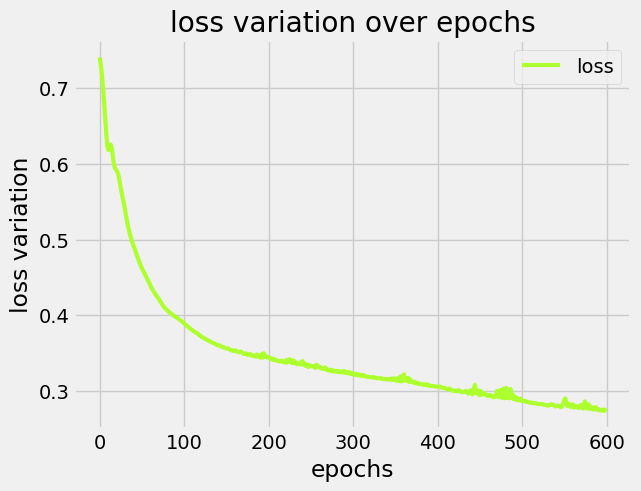

In [80]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(len(losses)) , losses , c='greenyellow' , linewidth= 3 , label = 'loss')
plt.xlabel("epochs")
plt.ylabel('loss variation')
plt.title("loss variation over epochs")
plt.legend()
plt.show()

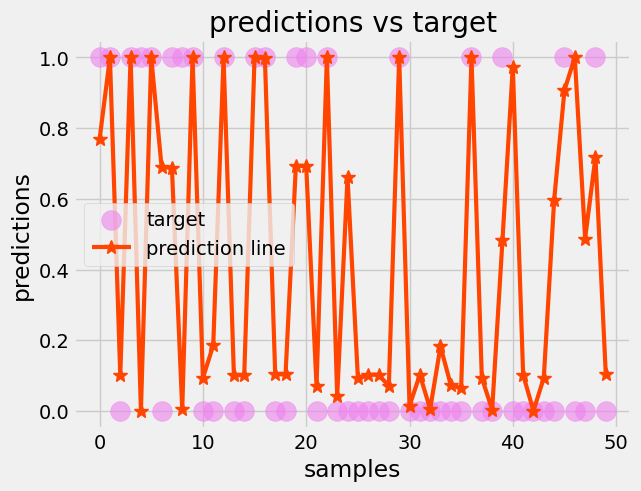

In [118]:
predictions = (predictions >= 0.5).float()
plt.scatter(range(50) , y_test[:50] , s=200 , alpha=0.6 ,c='violet' , label='target')
plt.plot(range(50) , y_pred[:50] , label='prediction line' , linewidth=3 , c='orangered' , marker='*' , ms=10)
plt.xlabel('samples')
plt.ylabel("predictions")
plt.title("predictions vs target")
plt.legend()
plt.show()

In [144]:
y_pred = (y_pred >= 0.5).float()
cm = confusion_matrix(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)
clr = classification_report(y_test , y_pred)
print(f"recall score : {recall*100:.2f}%")
print(f"f1 score : {f1*100:.2f}%")
print("-"*22)
print("confusion matrix : \n" , cm)
print()
print("classification report :\n" , clr)

recall score : 67.90%
f1 score : 74.32%
----------------------
confusion matrix : 
 [[85 12]
 [26 55]]

classification report :
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        97
         1.0       0.82      0.68      0.74        81

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.78       178



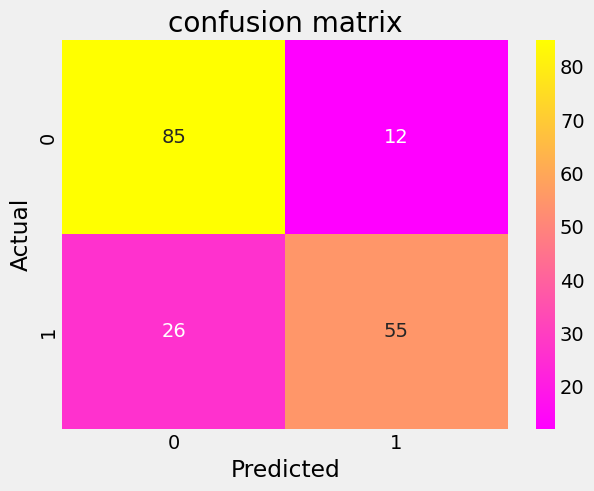

In [145]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.heatmap(cm , annot=True , fmt = 'd' , cmap='spring')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
